### 3.1.2 パーセプトロンの復讐

２つの入力信号を受け取りyを出力する
$$
    % "boldsymbol"で太字にしている
    \boldsymbol{y} =
        % ベクトルや行列は"left["と"right]"でベクトルや行列の括弧を作る
        % 括弧内に"array"環境を展開する
        % {c|cc}の形で中央揃え、縦線、中央揃え*2の並びに出来る
        \left[\begin{array}{c}
           0\ (w_{1}x_{1} + w_{2}+x_{2}\leqq0 ) \\
           1\ (w_{1}x_{1} + w_{2}+x_{2}<0) \\
        \end{array}\right] \quad
$$

これにバイアスbを追加。３つの信号にそれぞれの重みつけされた信号の和が乗算され次のニューロンに送信される。z

シンプルな形で書き換えると以下のようになる。０を超えたら１を出力し、そうでなければ０を出力。h(x)と言う関数を使う<br>
入力信号がh(x)と言う関数によって変換されて、その変換された値がyになる。<br>
入力信号の総和を出力信号に変換する関数は活性化関数と呼ばれる

<div style="text-align: center;">
y= h(b + w1x1+w2x2)
</div>

$$
    % "boldsymbol"で太字にしている
    \boldsymbol{h(x)} =
        % ベクトルや行列は"left["と"right]"でベクトルや行列の括弧を作る
        % 括弧内に"array"環境を展開する
        % {c|cc}の形で中央揃え、縦線、中央揃え*2の並びに出来る
        \left[\begin{array}{c}
           0\ (x\leqq0 ) \\
           1\ (x>0) \\
        \end{array}\right] \quad
$$

活性関数を使った式に書き換えていくと以下のようになる

<div style="text-align: center;">
a = b + w1x1 + w2x2<br>
y = h(a)
</div>

### 3.2.1　シグモイド関数

$$
    f(x) = \frac{1}{1+exp(-1)}
$$


ニューラルネットワークでは活性化関数にシグモイド関数を用いて信号の変換を行いその変換された信号が次のニューロンに伝えられる<br>
全章のパーセプトロンとニューラルネットワークの主な違いはこの活性化関数だけ

### 3.3.2　ステップ関数の実装

In [81]:
import numpy as np
x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [82]:
y = x > 0
y

array([False,  True,  True])

ブーリアンの配列が生成される。これをステップ関数を使うと０か１のint型にしてくれる。仕組みは以下の動きをする

In [83]:
y = y.astype(np.int)
y

array([0, 1, 1])

### 3.2.3　ステップ関数のグラフ

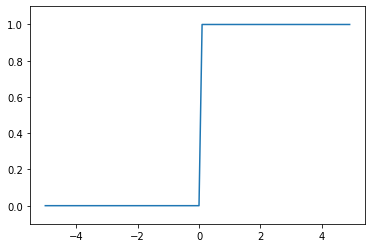

In [84]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x): #ステップ関数
    return np.array(x > 0,dtype=np.int)#numpyは、dtypeでintなど指定する事ができる。整数（データ型）

x = np.arange(-5.0,5.0,0.1) 
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)#y軸の範囲
plt.show()

### 3.2.4　シグモイド関数の実装

シグモイド関数は、次のように書ける

In [85]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

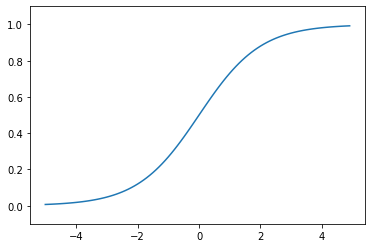

In [86]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.7 ReLU関数

最近はReLU関数が用いられる<br>
入力が０を超えていればその入力をそのまま出力し、０以下ならば０を出力する関数

$$
    % "boldsymbol"で太字にしている
    \boldsymbol{h(x)} =
        \left[\begin{array}{c}
           x\ (x>0 ) \\
           0\ (x\leqq0) \\
        \end{array}\right] \quad
$$

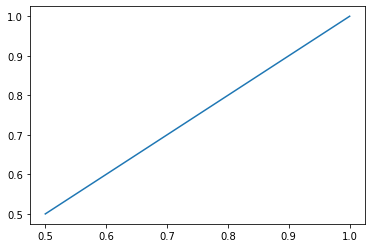

In [135]:
#ReLU関数の定義
def relu(x):
    return np.maximum(0,x)

#y_reluを今作ったReLU関数の戻り値とする(xの取りうる範囲は先ほどと同様-6から6)
y_relu =relu(x)
#プロットしてみる
plt.plot(x,y_relu)

### 3.3 多次元配列の計算

In [136]:
import numpy as np
A=np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [137]:
np.ndim(A)

1

In [138]:
A.shape
#次元数

(4,)

In [139]:
A.shape[0]
#タプル

4

### 3.3.2 行列の積

In [140]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [141]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [142]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [143]:
#１次元配列はベクトルを、２次元配列では行列の積を計算する
# 注意としては、np.dot(A,B)とnp.dot(B,A)は異なる値になり得る

In [144]:
# ５６ページ　行列の積では、対応する次元の要素数を一致させる事！
# 参考書の図を参照

In [145]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [146]:
B = np.array([7,8])
B.shape

(2,)

In [147]:
np.dot(A,B)

array([23, 53, 83])

### 3.3.3ニューラルネットワークの行列の積

In [148]:
X = np.array([1,2])
X.shape

(2,)

In [149]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [150]:
W.shape

(2, 3)

In [151]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


np.dot（多次元配列のドット積）を使えば、Yの結果を一度に計算できる。すなわちYの要素数が１００や１０００であったとしても、一度の演算で計算できる。

### 3.4３層ニューラルネットワークの実装

ここでは、入力から出力への処理（フォワード方向）への処理を行う

### 記号の確認

$$
 w_{1２}^{(1) }x_{(1)}
$$


右上の（１）は、第１層の重み、第１層のニューロンを意味している<br>
重みの右下の２つの数字は、次層のニューロンと前層のニューロンのインデックス番号から構成される<br>
上記の式で説明すると、前層のニューロンx2とから次層の１番目のニューロン a_{1}^{(1) }への重みである事を意味する


### 3.4.2　各層における信号伝達の実装

６０ページの図を式で表す

式（３.８）
$$
  a_{1}^{(1) } = w_{11}^{(1) }x_{(1)}+ w_{12}^{(1) }x_{(2)}+b_{(1)}^{(1)}
$$

また、行列の席を用いると、第１層目の「重み付き和」は次の式でまとめて表す事ができる

式（３．９）
 $$ A^{(1)}= XW^{(1)}+B^{(1)}$$  

但し、以下の式になる

$$A^{(1)}, XW^{(1)},B^{(1)}$$

$$A^{(1)}=( a_{1}^{(1) }\ a_{2}^{(1) }\ a_{3}^{(1) })
~~~  X=(x_{(1)}\ x_{(2)})
~~~ B=( b_{1}^{(1)}\  b_{2}^{(1)} \ b_{3}^{(1)})$$

$$W^{(1)}=\left(
 \begin{array}{cccc}
 w_{11}^{(1) }& w_{21}^{(1) }&w_{(31)}^{(1) }\\
 w_{12}^{(1) }& w_{22}^{(1) }& w_{32}^{(1) }\\
\end{array}
\right)$$

In [157]:
#式（３．９）を実装してみる　。ここでは入力、重み、バイアスは適当な値を入れている
x = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [158]:
print(W1.shape)

(2, 3)


In [159]:
print(X.shape)

(2,)


In [160]:
print(B1.shape)

(3,)


In [156]:
A1=np.dot(X,W1) + B1

#続いて図３−１８を実装する

In [162]:
Z1 = sigmoid(A1)
print(A1)

[0.6 1.3 2. ]


In [163]:
print(Z1)

[0.64565631 0.78583498 0.88079708]


In [179]:
#図３−１８　入力層から第２層への信号の伝達について実装をする

In [175]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

In [176]:
print(Z1.shape)

(3,)


In [177]:
print(W2.shape)

(3, 2)


In [178]:
print(B2.shape)

(2,)


In [180]:
#図3-19　第１双から第２層への信号伝達

In [181]:
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

In [184]:
def identity_function(x):
    return x

W3 =np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

 identity_function()という関数を定義して、この関数を「恒等関数」という。出力層の活性化関数と利用する。恒等関数は、入力をそのまま出力する関数

### 3.4.3　実装まとめ

In [204]:
# 重みとバイアスの初期化
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 入力信号を出力へ変換
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    print("入力層から第1層へ")
    a1 = np.dot(x, W1) + b1
    print("a1 = ", a1)
    z1 = sigmoid(a1)
    print("z1 = ", z1)
    print("第1層から第2層へ")
    a2 = np.dot(z1, W2) + b2
    print("a2 = ", a2)
    z2 = sigmoid(a2)
    print("z2 = ", z2)
    a3 = np.dot(z2, W3) + b3
    print("第2層から出力層へ")
    print("a3 = ", a3)
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
print("input x = ", x)
y = forward(network, x)
print("output y = ", y)

input x =  [1.  0.5]
入力層から第1層へ
a1 =  [0.3 0.7 1.1]
z1 =  [0.57444252 0.66818777 0.75026011]
第1層から第2層へ
a2 =  [0.51615984 1.21402696]
z2 =  [0.62624937 0.7710107 ]
第2層から出力層へ
a3 =  [0.31682708 0.69627909]
output y =  [0.31682708 0.69627909]


In [ ]:
66ページから